In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


## Day 9 "outlier removal"

In [5]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Removing outliers is essential to ensure the accuracy and reliability of statistical analyses, as outliers can skew results and distort interpretations, leading to misleading conclusions and compromised data integrity. By removing outliers, the overall distribution becomes more representative of the underlying data patterns, facilitating more accurate modeling and decision-making processes.















<Axes: >

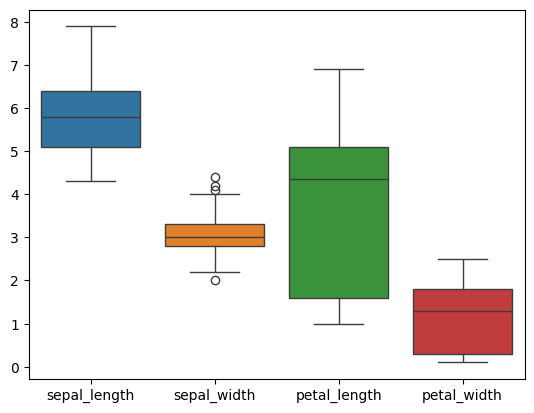

In [6]:
#box plot of complete dataset
sns.boxplot(data=df)

from the above box plot we can see that we have some outliers in "sepal_width"

<Axes: xlabel='sepal_width'>

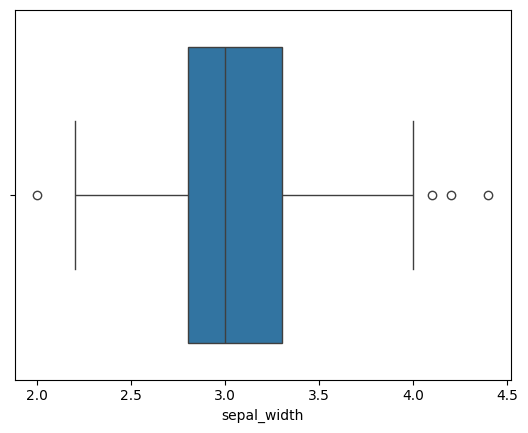

In [7]:
#viualizing sepal_width for outlier detection
sns.boxplot(data=df,x="sepal_width")

we can see that their are outliers which is smaller than 2.0 and greater than 4.0

## Removing outlier

In [9]:
# first we need to see the q1 and q3 using describe function
df["sepal_width"].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In the above cell the 25% represent Q1 and 75% represent Q3 using these 2 parameters we can easily remove outliers

In [18]:
Q1,Q3 = np.percentile(df.sepal_width,[25,75])
IQR =Q3-Q1
print("IQR =",IQR)
lower_fence = Q1-1.5*(IQR)
higher_fence = Q3+1.5*(IQR)
print("lower =", lower_fence,", higher =",higher_fence)

IQR = 0.5
lower = 2.05 , higher = 4.05


In [20]:
# Filter out rows where the values are within the lower and higher fences
filtered_df = df[(df['sepal_width'] >= lower_fence) & (df['sepal_width'] <= higher_fence)]


<Axes: ylabel='sepal_width'>

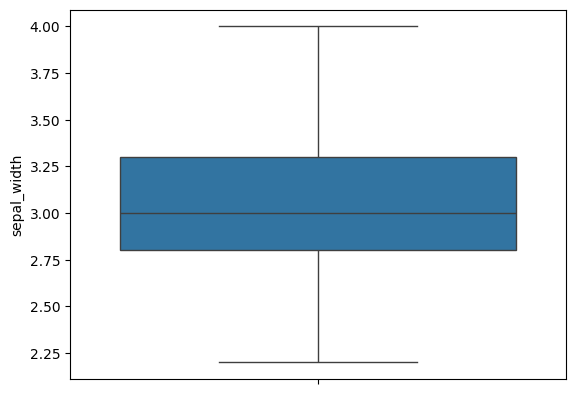

In [25]:
sns.boxplot(filtered_df.sepal_width)

Now you can see outliers are successfully removed.

## removing outliers from a simple distibution


In [64]:
x = 1,2,2,2,3,3,4,5,5,5,6,6,6,6,7,8,8,9,27
# first we need to sort the data in acesnding order
sorted_data = sorted(x)
sorted_data


[1, 2, 2, 2, 3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 7, 8, 8, 9, 27]

<Axes: >

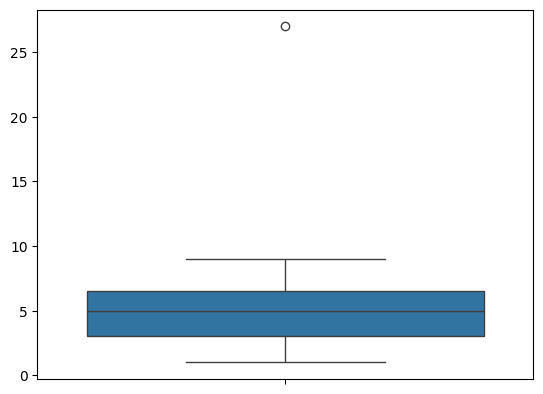

In [65]:
#now we make a box plot to see outliers
sns.boxplot(x)

In [66]:
#now we will find out the outliers using IQR
Q1,Q3 = np.percentile(x,[25,75])
print("Q1=",Q1)
print("Q3=",Q3)
IQR = Q3-Q1
print("IQR =",IQR)

Q1= 3.0
Q3= 6.5
IQR = 3.5


In [67]:
lower = Q1-1.5*(IQR)
print("lower =",lower)
higher = Q3+1.5*(IQR)
print("higher =",higher)

lower = -2.25
higher = 11.75


In [68]:
#now removing values which are greater than higher and lower than lower

# Convert x to a NumPy array
x = np.array(x)
# Remove values which are greater than higher and lower than lower
filtered_x = x[(x >= lower) & (x <= higher)]




<Axes: >

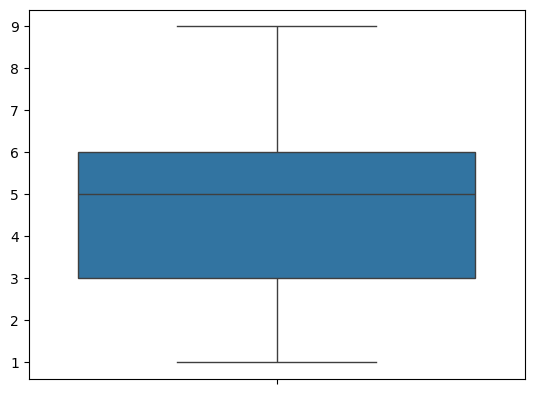

In [69]:
sns.boxplot(filtered_x)